In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


<Figure size 400x400 with 0 Axes>

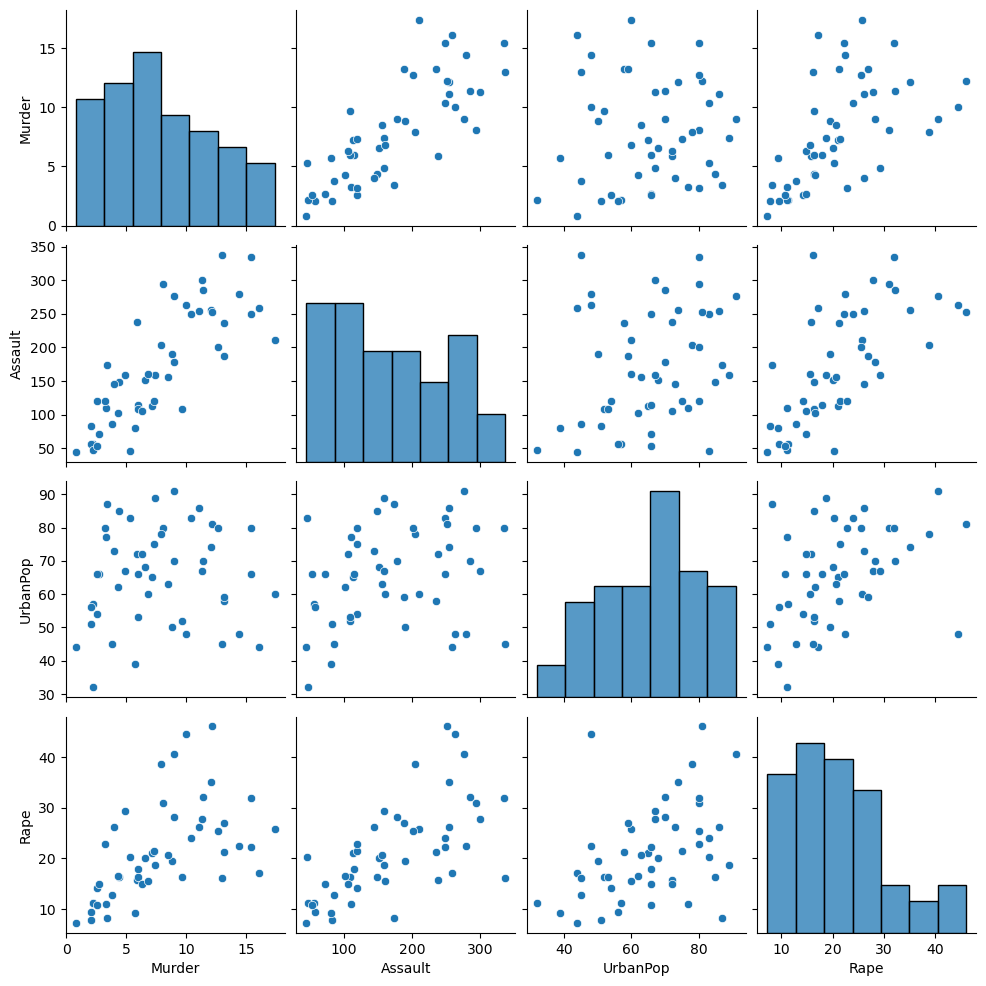

In [16]:
plt.figure(figsize=(4,4))
sns.pairplot(data=df, palette="Set2")
plt.show()

In [17]:
scalar = StandardScaler().set_output(transform='pandas')
df_scaled = scalar.fit_transform(df)

In [18]:
eps_range = [0.2,0.4,0.6,1]
mp_range = [2,3,4,5]
cnt = 0
a =[]

for i in eps_range:
    for j in mp_range:
        clust_DB = DBSCAN(eps=i, min_samples=j)
        clust_DB.fit(df_scaled.iloc[:,:5])
        
        if len(set(clust_DB.labels_)) > 2:
            """_summary_
            This condition is to avoid the case where the clustering is not
            possible due to the small number of data points because silhouette score
            cannot be calculated with only one cluster or less than 2 cluster.

            Here in clust_DB.labels_ we get  values like [-1,1,0,0,1,1,2,2....]
            Whete -1 is the outlier/noise
            1,2,3.. are the classified clusters
            """

            cnt = cnt + 1
            df_scaled['Clust'] = clust_DB.labels_

            # Adding temperature column which containes labelled of cluster or outlier.noise
            milk_scl_inliers = df_scaled[df_scaled['Clust']!=-1]
            
            sil_sc = silhouette_score(
                milk_scl_inliers.iloc[:,:-1],   # All the features except the Cluser label
                milk_scl_inliers.iloc[:,-1]     # Cluster label
            )
            
            a.append([cnt,i,j,sil_sc])
            print(i,j,sil_sc)
    
a = np.array(a)
pa = pd.DataFrame(a,columns=['Sr','eps','min_pt','sil'])

print("\nSilhouette Score:")
print(pa)

print("\nBest Paramters:")
best_params = pa[pa['sil'] == pa['sil'].max()]
print(best_params)

0.4 2 0.9294801120696734
0.6 2 0.4598846166598499
0.6 3 0.7189015458613475
1 2 0.11526083405519487
1 3 0.11526083405519487
1 4 0.21075699219922683
1 5 0.22417529426027302

Silhouette Score:
    Sr  eps  min_pt       sil
0  1.0  0.4     2.0  0.929480
1  2.0  0.6     2.0  0.459885
2  3.0  0.6     3.0  0.718902
3  4.0  1.0     2.0  0.115261
4  5.0  1.0     3.0  0.115261
5  6.0  1.0     4.0  0.210757
6  7.0  1.0     5.0  0.224175

Best Paramters:
    Sr  eps  min_pt      sil
0  1.0  0.4     2.0  0.92948


In [29]:
clust_DB = DBSCAN(
    eps=best_params['eps'][0],
    min_samples=int(best_params['min_pt'][0])
)
clust_DB.fit(df_scaled.iloc[:,:5])


clust_df = df.copy()
clust_df['Clust'] = clust_DB.labels_

# Adding temperature column which containes labelled of cluster or outlier.noise
milk_scl_inliers = clust_df[clust_df['Clust']!=-1]

sil_sc = silhouette_score(
    milk_scl_inliers.iloc[:,:-1],   # All the features except the Cluser label
    milk_scl_inliers.iloc[:,-1]     # Cluster label
)

print("Silhouette Score:",sil_sc)

Silhouette Score: 0.9784324413432682


In [30]:
milk_scl_inliers.groupby('Clust').mean()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,10.75,251.5,84.5,25.05
1,2.15,56.5,56.5,10.40
